##Trabalhando com Planilhas Excel

In [11]:
#Importando a biblioteca
import pandas as pd

In [12]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [13]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [14]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [15]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [16]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [17]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
70,Natal,2019-02-14,743.00,854,4
220,Natal,2019-01-02,42.71,1035,1
64,Natal,2019-02-22,704.00,853,4
92,Fortaleza,2019-01-01,3.49,1005,4
81,Aracaju,2018-01-01,53.41,1520,2


In [18]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [19]:
#Alterando o tipo da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [20]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


####Tratando valores faltantes

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

In [52]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [53]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
df.isnull().sum()

In [55]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [56]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [57]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [58]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

####Criando colunas novas

In [23]:
#Criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [25]:
df["Receitas/Vendas"] = df["Receita"].div(df['Vendas'])

In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [27]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [28]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [29]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [30]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [31]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [32]:
#Ordedando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


###Trabalhando com datas

In [33]:
#Transformando coluna data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [34]:
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [35]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [36]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [38]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [40]:
#Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [41]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda
95,Salvador,2019-01-01,5.13,1035,1,5.13,1.0,2019


In [44]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [45]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda
131,Natal,2019-01-02,63.48,1037,3,190.44,3.0,2019,1,2
199,Salvador,2019-01-02,153.87,1036,3,461.61,3.0,2019,1,2
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0,2019,1,2
185,Natal,2019-01-02,6.67,1036,1,6.67,1.0,2019,1,2
51,Natal,2018-01-21,859.00,852,4,3436.00,4.0,2018,1,21


In [46]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [47]:
#Calculando a diferença de dias
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
65,Natal,2019-04-05,292.00,852,2,584.00,2.0,2019,4,5,459 days
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days
82,Fortaleza,2019-01-01,14.03,1004,5,70.15,5.0,2019,1,1,365 days
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days
71,Recife,2019-01-01,138.69,983,3,416.07,3.0,2019,1,1,365 days


In [49]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 =  df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [50]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days


##Visualização de dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

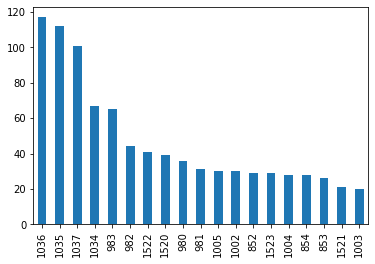

In [59]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

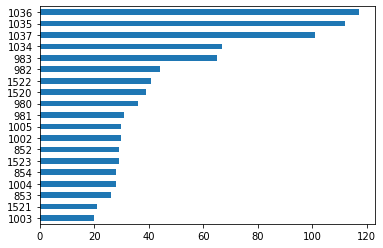

In [61]:
# #Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

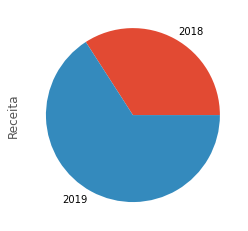

In [76]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [65]:
#Total de Vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

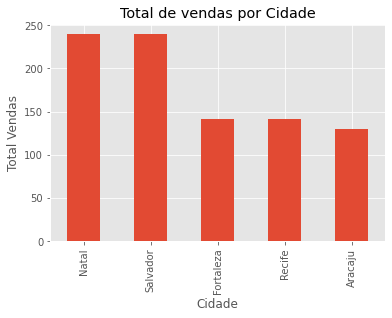

In [77]:
#Adicionado um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

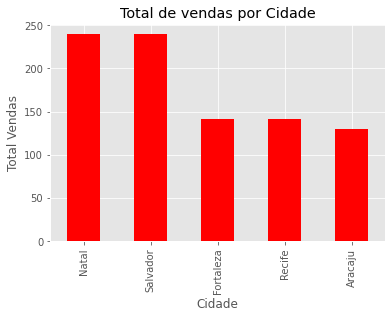

In [78]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [69]:
#Alterando o estilo
plt.style.use("ggplot")

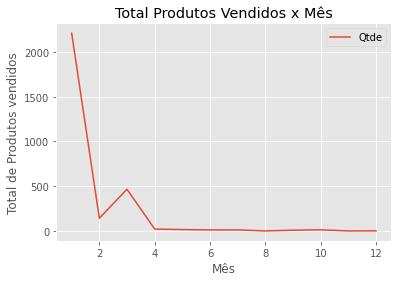

In [79]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos")
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

In [71]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

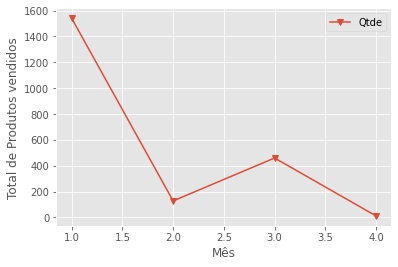

In [75]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos")
plt.legend();

In [74]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

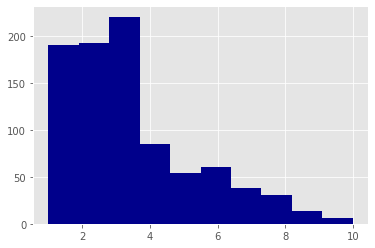

In [84]:
#Histograma
plt.hist(df["Qtde"], color="darkblue");

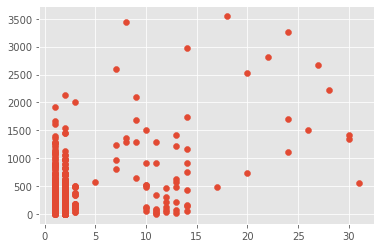

In [86]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

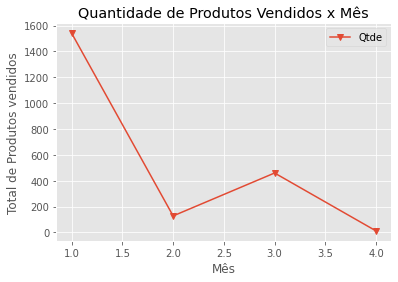

In [87]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos vendidos");
plt.legend()
plt.savefig("Gráfico QTDE x MÊS.png")